In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
summary = pd.read_csv('CocoG.csv')

summary

,Year,M,W,L,Win%,Set W-L,Set%,Game W-L,Game%,TB W-L,...,A%,DF%,1stIn,1st%,2nd%,SPW,RPW,TPW,DR,Best
0,2024,66,50,16,75.8%,106-44,70.7%,808-539,60.0%,8-7,...,5.2%,9.2%,57.5%,72.2%,44.1%,60.3%,48.6%,54.4%,1.22,W (2x)
1,2023,67,51,16,76.1%,107-43,71.3%,776-563,58.0%,8-1,...,6.0%,5.1%,60.7%,68.1%,47.6%,60.1%,45.7%,52.9%,1.14,W (4x)
2,2022,61,38,23,62.3%,80-51,61.1%,672-572,54.0%,10-7,...,6.0%,7.5%,63.0%,65.9%,45.8%,58.5%,44.7%,51.5%,1.08,F (Roland Garros)
3,2021,50,34,16,68.0%,69-46,60.0%,590-514,53.4%,10-7,...,6.8%,7.2%,60.4%,67.7%,46.2%,59.2%,43.4%,51.3%,1.06,W (Parma)
4,2020,18,10,8,55.6%,26-19,57.8%,229-217,51.3%,3-2,...,4.0%,10.6%,61.0%,68.8%,41.3%,58.1%,41.9%,50.2%,1.00,SF (Lexington)
5,2019,16,11,5,68.8%,21-16,56.8%,172-176,49.4%,3-0,...,3.9%,6.8%,65.2%,64.7%,42.8%,57.1%,42.8%,49.9%,1.00,W (Linz)


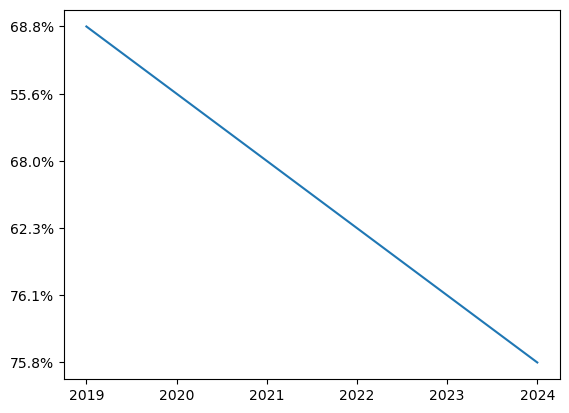

In [60]:
plt.plot(summary['Year'], summary['Win%'])  # Plot the chart
plt.show()  # display

## More detailed Data

In [3]:
y2020 = pd.read_csv('wta_matches_2020.csv')
y2021 = pd.read_csv('wta_matches_2021.csv')
y2022 = pd.read_csv('wta_matches_2022.csv')
y2023 = pd.read_csv('wta_matches_2023.csv')
y2024 = pd.read_csv('wta_matches_2024.csv')

In [32]:
win2020 = y2020[y2020['winner_name'] == 'Coco Gauff']
lose2020 = y2020[y2020['loser_name'] == 'Coco Gauff']

win2021 = y2021[y2021['winner_name'] == 'Coco Gauff']
lose2021 = y2021[y2021['loser_name'] == 'Coco Gauff']

win2022 = y2022[y2022['winner_name'] == 'Coco Gauff']
lose2022 = y2022[y2022['loser_name'] == 'Coco Gauff']

win2023 = y2023[y2023['winner_name'] == 'Coco Gauff']
lose2023 = y2023[y2023['loser_name'] == 'Coco Gauff']

win2024 = y2024[y2024['winner_name'] == 'Coco Gauff']
lose2024 = y2024[y2024['loser_name'] == 'Coco Gauff']

In [103]:
Cgyears = pd.concat([win2020, lose2020, win2021, lose2021, win2022, 
                   lose2022, win2023, lose2023, win2024, lose2024], axis=0)

Cgyears['Year'] = years['tourney_date'].astype(str).str[:4]

Cgyears['Win'] = years['winner_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)
Cgyears['Lose'] = years['loser_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)

In [119]:
win2020 = y2020[y2020['winner_name'] == 'Aryna Sabalenka']
lose2020 = y2020[y2020['loser_name'] == 'Aryna Sabalenka']

win2021 = y2021[y2021['winner_name'] == 'Aryna Sabalenka']
lose2021 = y2021[y2021['loser_name'] == 'Aryna Sabalenka']

win2022 = y2022[y2022['winner_name'] == 'Aryna Sabalenka']
lose2022 = y2022[y2022['loser_name'] == 'Aryna Sabalenka']

win2023 = y2023[y2023['winner_name'] == 'Aryna Sabalenka']
lose2023 = y2023[y2023['loser_name'] == 'Aryna Sabalenka']

win2024 = y2024[y2024['winner_name'] == 'Aryna Sabalenka']
lose2024 = y2024[y2024['loser_name'] == 'Aryna Sabalenka']

In [120]:
Asyears = pd.concat([win2020, lose2020, win2021, lose2021, win2022, 
                   lose2022, win2023, lose2023, win2024, lose2024], axis=0)

Asyears['Year'] = Asyears['tourney_date'].astype(str).str[:4]

Asyears['Win'] = Asyears['winner_name'].apply(lambda x: 0 if x != 'Aryna Sabalenka' else 1)
Asyears['Lose'] = Asyears['loser_name'].apply(lambda x: 0 if x != 'Aryna Sabalenka' else 1)

In [122]:
# Calculate Win Percentage
Cgyears['Win_Percentage'] = Cgyears['Win'] / (Cgyears['Win'] + Cgyears['Lose'])

Asyears['Win_Percentage'] = Asyears['Win'] / (Asyears['Win'] + Asyears['Lose'])

In [123]:
# Group by Year and Surface, and calculate average win percentage

Cgperformance_summary = Cgyears.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()

Asperformance_summary = Asyears.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()


In [124]:
Cgperformance_summary

,Year,surface,Win_Percentage
0,2020,Clay,0.500000
1,2020,Hard,0.571429
2,2021,Clay,0.800000
3,2021,Grass,0.666667
4,2021,Hard,0.600000
5,2022,Clay,0.714286
6,2022,Grass,0.714286
7,2022,Hard,0.575000
8,2023,Clay,0.636364
9,2023,Grass,0.571429


In [125]:
Asperformance_summary

,Year,surface,Win_Percentage
0,2020,Clay,0.666667
1,2020,Hard,0.766667
2,2021,Clay,0.812500
3,2021,Grass,0.700000
4,2021,Hard,0.675676
5,2022,Clay,0.642857
6,2022,Grass,0.666667
7,2022,Hard,0.571429
8,2023,Clay,0.823529
9,2023,Grass,0.750000


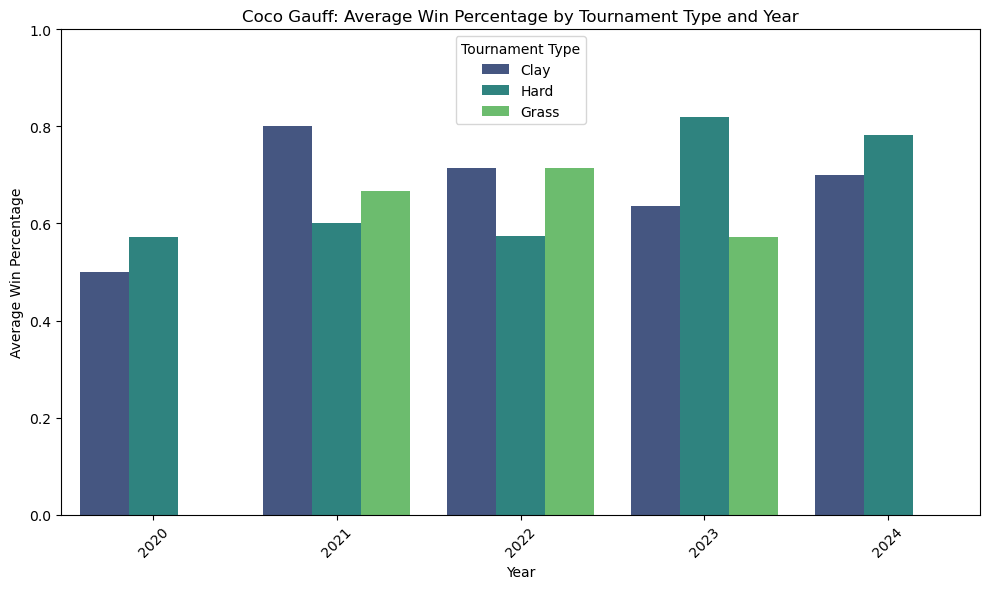

In [135]:
# Calculate average Win_Percentage by Year and Type
Cgaverage_win_percentage = Cgperformance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Cgaverage_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Coco Gauff: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

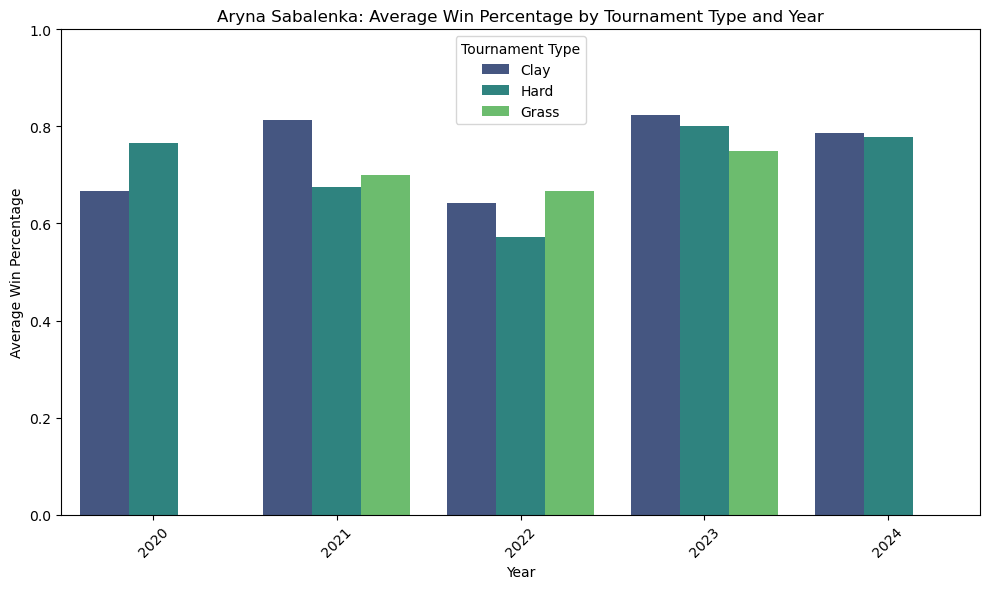

In [134]:
# Calculate average Win_Percentage by Year and Type
Asaverage_win_percentage = Asperformance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Asaverage_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Aryna Sabalenka: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [132]:
# Group by Year and Surface, and calculate average win percentage

Cgtourney_performance = Cgyears.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

Cgtourney_performance['Type'] = np.where(
    Cgtourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

Astourney_performance = Asyears.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

Astourney_performance['Type'] = np.where(
    Astourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

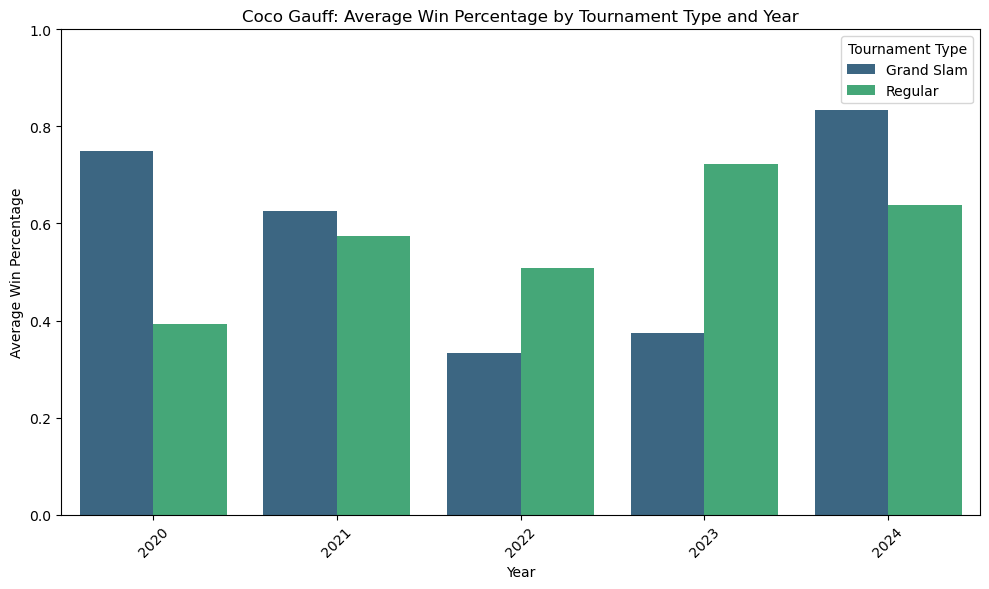

In [133]:
# Calculate average Win_Percentage by Year and Type
Cgaverage_win_percentage = Cgtourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Cgaverage_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Coco Gauff: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

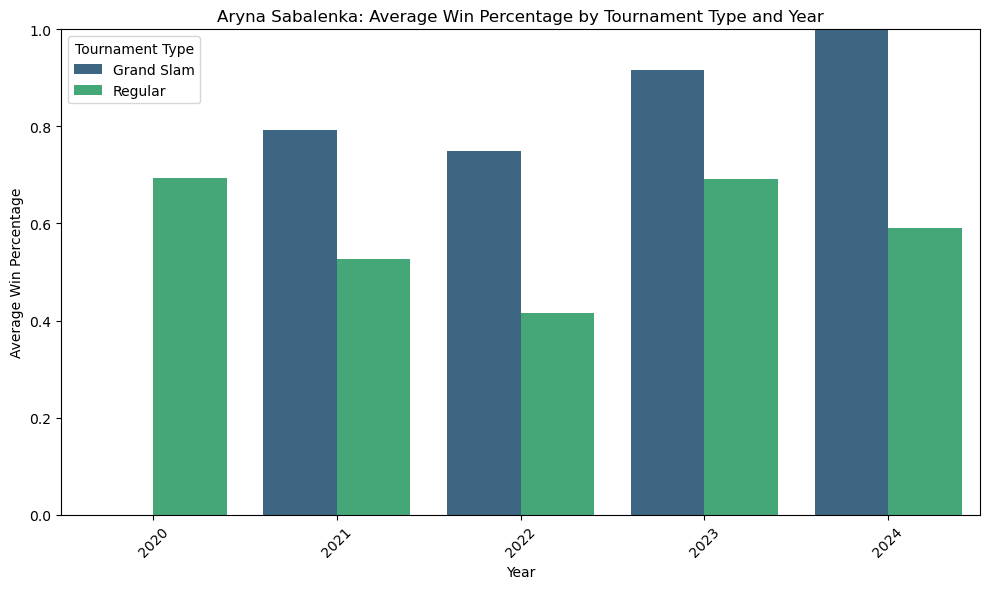

In [136]:
# Calculate average Win_Percentage by Year and Type
Asaverage_win_percentage = Astourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Asaverage_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Aryna Sabalenka: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()